Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2024
<br>

<h1><center>Tarea 2: HAC, DBSCAN, HDBSCAN y GMM </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 26 de abril


## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
##Importa acá las librerias que vayas a utilizar
## De ser necesario, utiliza el comando !pip install a aquellas librerias o modulos que no se encuentren instalados, como puede ser HDBSCAN.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from random import random
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OneHotEncoder, minmax_scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, cluster_optics_dbscan
from sklearn.mixture import GaussianMixture

El siguiente codigo sirve para importar HDBSCAN en el caso de que les arroje error importar desde sklearn.

In [2]:
from hdbscan import HDBSCAN

# Introducción

El conjunto de datos correspnde a características extraidas de imagenes de distintos tipos de frijoles secos, los cuales presentan distintas formas, figuras, tipos y estructuras. Según esta premisa, el objetivo de la tarea es identificar en qué consiste el dataset entregado para predecir el tipo de frijol al cual corresponde cada dato (dado por la columna "Class") por medio del uso de HAC, DBSCAN, HDBSCAN y GMM. 

En esta tarea deberás trabajar con el dataset de Dry Bean que puedes descargar de [Kaggle](https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification) o desde canvas.

# Parte 1: Carga y Preprocesamiento de Datos (9 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de datos (1 puntos)

In [3]:
df = pd.read_csv('dry_bean_dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### 1.2 Descripcion del Dataset (5 puntos)

#### 1.2.1 Describa brevemente cuantas columnas tiene el dataset y en que consisten las columna del dataset entregado (1 puntos)

In [4]:
df.shape

(13611, 17)

**Respuesta:** El dataframe tiene 17 columna y 13611 filas, las cuales son:

*(Obtenido de la traducción de la página oficial de los datos)*
- Area: El área de una zona de frijol y el número de píxeles dentro de sus límites.

- Perimeter: Circunferencia del frijol definida como la longitud de su borde.

- MajorAxisLength: La distancia entre los extremos de la línea más larga que se puede dibujar desde un frijol.

- MinorAxisLength: La línea más larga que se puede dibujar desde el frijol mientras se encuentra perpendicular al eje principal.

- AspectRation: Define la relación entre L y l.

- Eccentricity: Excentricidad de la elipse que tiene los mismos momentos que la región.

- ConvexArea: Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.

- EquivDiameter: El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.

- Extent: La proporción de los píxeles en la caja delimitadora con respecto al área del frijol.

- Solidity: También conocida como convexidad. La proporción de los píxeles en la carcasa convexa respecto a los encontrados en los frijoles.

#### 1.2.2 ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


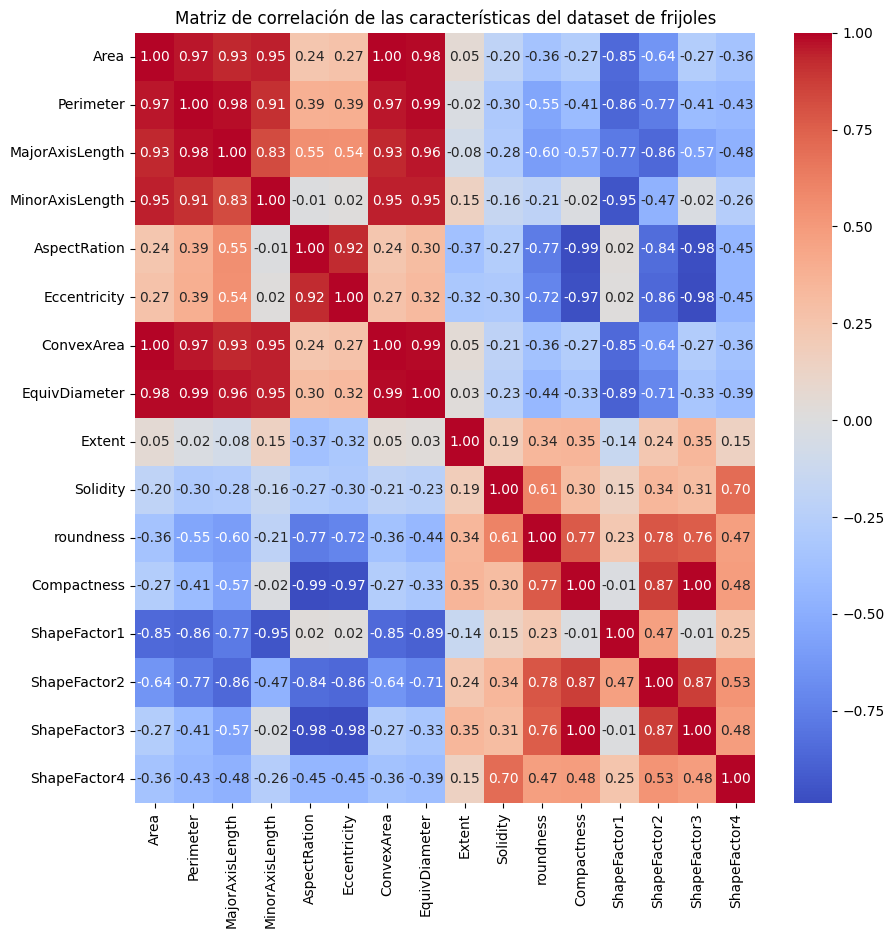

In [6]:
columnas_cuantitativa = df.columns[df.columns != 'Class']
correlation_matrix = df[columnas_cuantitativa].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de las características del dataset de frijoles")
plt.show()

**Respuesta:** En general, según la simple descripcion de dataframe no se puede decidir si es posible eliminar los datos, ya que esto podría ocurrir en el caso de que los datos tengan una desviacion estandar pequeña en relacion con el valor de los datos. Viendo el mapa de la correlacion, quizas se pueda tomar una decision más precisa, ya que hay valores que si es que se tiene una correlacion alta entre ellos, el valor de uno pueda reemplazar otro, por lo que puede ser posible eliminar alguna columna que tenga que ver con el tamaño de los frijoles.

#### 1.2.3 ¿Cuantos tipos de frijoles hay? ¿Qué puedes observar sobre la cantidad de frijoles por clase? ¿Existe un desbalance de clases? (2 puntos)

In [7]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

**Respuesta:** Hay 7 tipos de frijoles, los cuales son: SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA y DERMASON. Se puede observar que hay un desbalance entre las clases ya que, como se aprecia, hay una diferencia muy grande entre algunos de los frijoles, como Bombay y Dermason.

### 1.3 Determinación de valores nulos (1 punto)

Determina si existen datos y/o valores nulos presentes en el dataset. En caso de que existan, realiza el tratamiento pertinente.

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

**Respuesta:** No hay datos nulos, por lo que no es necesario hacer un tratamiento de datos.

### 1.4 Manejo del Dataset (2 puntos)

Normaliza los valores de las columnas del dataset. ¿Por qué esto es importante para el análisis?

In [9]:
df_norm = df.copy()

columnas_cuantitativa = df.columns[df.columns != 'Class']
scaler = MinMaxScaler()
df_norm[columnas_cuantitativa] = scaler.fit_transform(df_norm[columnas_cuantitativa])

X = df_norm.drop('Class', axis=1)
y = df_norm['Class']

**Respuesta** Esto siempre es de gran importancia para que todos los datos tengan el mismo peso y no ocurran desbalances serios entre los valores de los datos usados.

# Parte 2: HAC (5 puntos)

### 2.1 Reliza un dendograma sin clusters y con distancia threshold igual a 0 para visualizar los datos (1 punto)

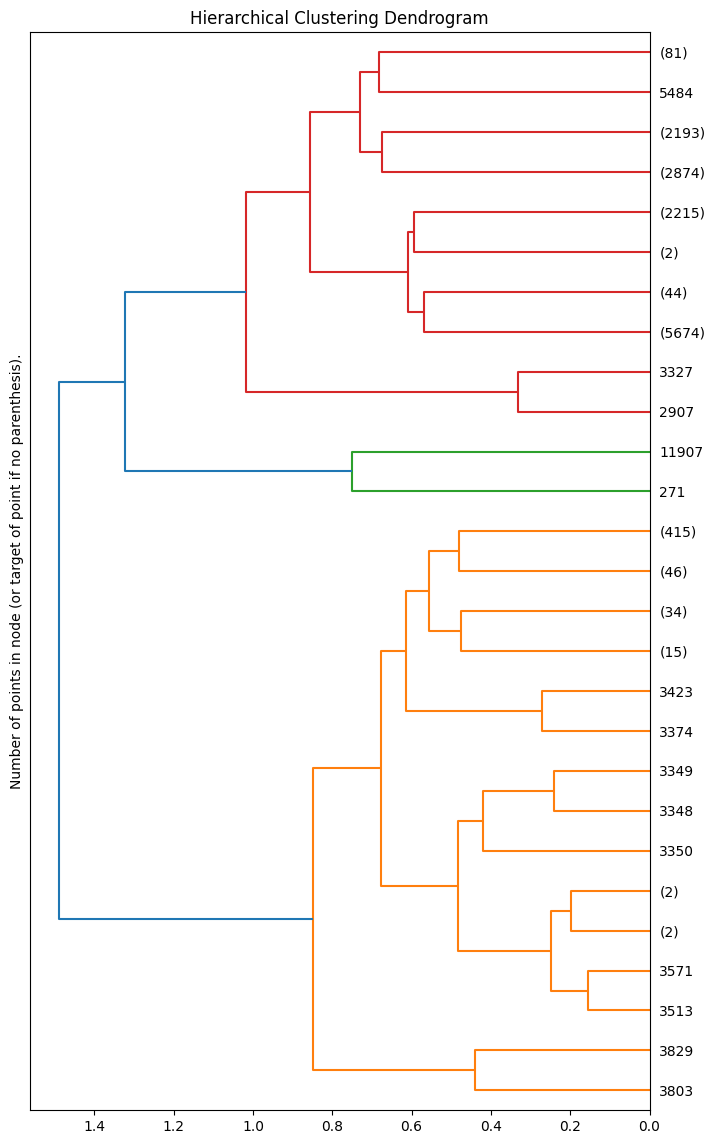

In [10]:
hac = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
hac = hac.fit(X)

# codigo de clase 6
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_) # model.labels_: cluster labels for each point
    for i, merge in enumerate(model.children_): 
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples] # in-order enumeration of nodes
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(8, 14))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hac, truncate_mode="level", p=5, orientation='left')
plt.ylabel("Number of points in node (or target of point if no parenthesis).")
plt.show()

### 2.2 Realiza los Clustering de Agrupación Jerarquica (HAC) para cada distancia de clustering aglomerativo (linkage), prueba utilizando número entre 2 y 10. Calcula el Silhouette para ver cual funcionó mejor y explica el por qué de los resultados. (1.5 puntos)


In [11]:
n_cluster = range(2, 11)

for clusters in n_cluster:
    print(f"Cluster {clusters}")
    hac1 = AgglomerativeClustering(linkage='single', n_clusters=clusters)
    hac1 = hac1.fit(X)
    labels1 = hac1.labels_

    hac2 = AgglomerativeClustering(linkage='average', n_clusters=clusters)
    hac2 = hac2.fit(X)
    labels2 = hac2.labels_

    hac3 = AgglomerativeClustering(linkage='complete', n_clusters=clusters)
    hac3 = hac3.fit(X)
    labels3 = hac3.labels_

    hac4 = AgglomerativeClustering(linkage='ward', n_clusters=clusters)
    hac4 = hac4.fit(X)
    labels4 = hac4.labels_

    print(f"    Single: {silhouette_score(X, labels1, metric='euclidean')}")
    print(f"    Average: {silhouette_score(X, labels2, metric='euclidean')}")
    print(f"    Complete: {silhouette_score(X, labels3, metric='euclidean')}")
    print(f"    Ward: {silhouette_score(X, labels4, metric='euclidean')}")

Cluster 2
    Single: 0.5209530216879056
    Average: 0.5454971763845088
    Complete: 0.5435790600611488
    Ward: 0.3988170397453534
Cluster 3
    Single: 0.40631457891501843
    Average: 0.4820399227163753
    Complete: 0.3119853662423354
    Ward: 0.40739382064225615
Cluster 4
    Single: 0.3825833001616134
    Average: 0.34282514108575146
    Complete: 0.2684218174262166
    Ward: 0.3548845679541134
Cluster 5
    Single: 0.37921823870662674
    Average: 0.3924683380415566
    Complete: 0.2677367378667258
    Ward: 0.3698709691607276
Cluster 6
    Single: 0.25842114205195515
    Average: 0.3866859091917422
    Complete: 0.2962885630480403
    Ward: 0.2904734473041057
Cluster 7
    Single: 0.15368811985865122
    Average: 0.38612073697447047
    Complete: 0.28002200053281423
    Ward: 0.289278717798596
Cluster 8
    Single: 0.12511200436015266
    Average: 0.3427003805961169
    Complete: 0.24894673390646013
    Ward: 0.2823359869151022
Cluster 9
    Single: 0.12279689657871275
    

### 2.3 Ahora, realiza los Clustering de Agrupación Jerarquica (HAC) para cada tipo de linkage. Calcula el Silhouette para ver cual funcionó mejor y explica el por qué de los resultados, mencionando en manera funciona cada linkage. (1.5 puntos)

In [12]:
# Las respuestas de la 2.2 y 2.3 se pueden ver fucionadas en la 2.2 y se determina que el mejor es average y 2 clusters 
hac2 = AgglomerativeClustering(linkage='average', n_clusters=2)
hac2 = hac2.fit(X)
labels2 = hac2.labels_

print(silhouette_score(X, labels2, metric='euclidean'))

0.5454971763845088


### 2.4 Grafica los clusters utilizando un PCA de 2 dimensiones de los datos. (1 punto)

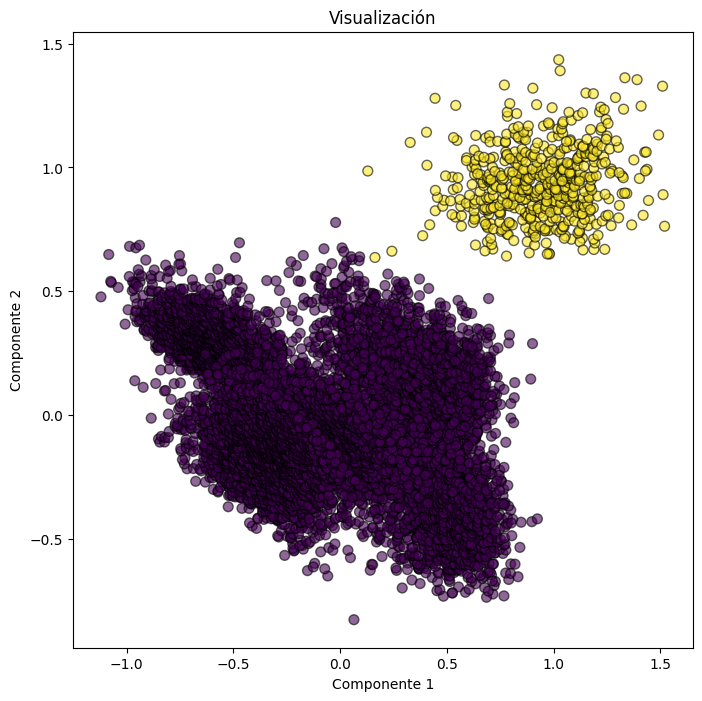

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

hac = AgglomerativeClustering(linkage='average', n_clusters=2)
labels = hac.fit_predict(X_pca)

# Graficar los resultados del PCA
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title('Visualización')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Con el análisis realizado, ¿Cuál es la importancia del criterio de vinculación al momento de agrupar los datos? Pruebe ahora utilizando solamente dos clusters y compare los graficos.

Se puede ver que el criterio de vinculación es importante ya que, dependiendo de este, se pueden obtener distintos resultados, pudimos ver que el linkage "average" fue el mejor en promedio, esto en general puede ser normal, porque a diferencia de sigle y complete por ejemplo, este calcula el promedio de distancia de los puntos vecinos y, esto tambien se puede ver con el numero de clusters por lo que se graficaron y se pueden ver claramente 2 clusters separados.

# Parte 3: DBSCAN y HDBSCAN (15 puntos)

### 3.1.- DBSCAN

Utilizando DBSCAN, itera sobre valores de eps entre 0.25 y 2, con un salto de 0.25 por iteracion. Ademas, itera sobre el numero minimo de muestras, probando con 1, 2, 3 y 4. (3 puntos)

In [14]:
eps = np.linspace(0.25, 2, 8)
min_samples = [1, 2, 3, 4]

In [15]:
samples = []

for epsilon in eps:
    for min_sample in min_samples:
        print(f"epsilon: {epsilon} - min_samples: {min_sample}")
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        model = dbscan.fit(X)
        if len(np.unique(model.labels_)) > 1:
            print(f"    {np.unique(model.labels_)}")
            silhoutte = silhouette_score(X, model.labels_, metric='euclidean')
            print(f"    {silhoutte}")
            samples.append((epsilon, min_sample, silhoutte))

epsilon: 0.25 - min_samples: 1
    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
    -0.16170687123244784
epsilon: 0.25 - min_samples: 2
    [-1  0]
    0.37697227257051036
epsilon: 0.25 - min_samples: 3
    [-1  0]
    0.37697227257051036
epsilon: 0.25 - min_samples: 4
    [-1  0]
    0.38543103234349657
epsilon: 0.5 - min_samples: 1
    [0 1 2]
    0.40631457891501843
epsilon: 0.5 - min_samples: 2
    [-1  0]
    0.4703470282718301
epsilon: 0.5 - min_samples: 3
    [-1  0]
    0.4703470282718301
epsilon: 0.5 - min_samples: 4
    [-1  0]
    0.4703470282718301
epsilon: 0.75 - min_samples: 1
epsilon: 0.75 - min_samples: 2
epsilon: 0.75 - min_samples: 3
epsilon: 0.75 - min_samples: 4
epsilon: 1.0 - min_samples: 1
epsilon: 1.0 - min_samples: 2
epsilon: 1.0 - min_samples: 3
epsilon: 1.0 - min_samples: 4
epsilon: 1.25 - min_samples: 1
epsilon: 1.25 - min_samples: 2
epsilon: 1.25 - min_samples: 3
epsilon: 1.25 - min_samples: 4
epsilon: 1.5 - min_samples: 1

In [18]:
sorted_samples = sorted(samples, key=lambda x: x[2], reverse=True)
print(sorted_samples[:5])

[(0.5, 2, 0.4703470282718301), (0.5, 3, 0.4703470282718301), (0.5, 4, 0.4703470282718301), (0.5, 1, 0.40631457891501843), (0.25, 4, 0.38543103234349657)]


#### 3.1.2 Con la informacion de los parametros anterior, calcula cual es el numero de clusters optimo para el modelo DBSCAN. (1.5 puntos)

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
model = dbscan.fit_predict(X)

print(np.unique(model))
print(silhouette_score(X, model, metric='euclidean'))

[-1  0]
0.4703470282718301


**RESPUESTA:** Se puede ver por la casilla anterior que el optimo es 2 samples y eps 0.5 y el numero de clusters se puede considerar "2" ya que 0 es uno de ellos y -1 es una agrupacion de outliers bien separados.

#### 3.1.3 Determine tambien el valor optimo del parametro `eps` y `min_samples` (0.5 puntos)

**RESPUESTA:** Como se mencionó anteriormente el optimo se puede ver que es eps 0.5 y min_samples 2

#### 3.1.41 Obtenga el numero de clusters utilizando los parametros optimos encontrados. Explique porque podria haber encontrado ese valor, el cual se puede o no ajustar al numero de clases en el dataset. (1 puntos)

Se espera un analisis de ajuste de datos a clusters contra las clases. Puntaje por analisis y justificacion.

**RESPUESTA:** En general, se puede ver que probablemente DBSCAN no haya logrado capturar la diversidad del dataset con los parametros dados, ya que eran 7 clases y solo se obtuvo 1 cluster principal y ruido, por lo que hay una alta probabilidad de que si se hacen mas pequeños los parametros mejoren los resultados, ya que consideraria el radio de los vecinos cercanos aun más cerca (eps) y para el caso de min_samples puede variar si es mas pequeño o más grande, mientras ás pequeño, es probable que se divida más en clusters.  

### 3.2.- HDBSCAN

Utilizando HDSCAN, cree un modelo con el `cluster_selection_epsilon` igual al caso de DBSCAN y determine el numero de clusters. Itere sobre el min_cluster_size para encontrar el mejor silhoutte score. Compare el resultado con DBSCAN.  (3 puntos)

In [20]:
min_cluster_sizes = range(2, 10)
best_score = -np.inf
for size in min_cluster_sizes:
    clusterer = HDBSCAN(min_cluster_size=size, min_samples=2, cluster_selection_epsilon=0.5)
    labels = clusterer.fit_predict(X)
    if len(np.unique(labels)) > 1:
        score = silhouette_score(X, labels)
        print(f"min_cluster_size={size}, Silhouette Score={score}")
        if score > best_score:
            best_score = score
            best_size = size

print(f"Mejor min_cluster_size: {best_size} con Silhouette Score: {best_score}")

min_cluster_size=2, Silhouette Score=0.40076201082161006
min_cluster_size=3, Silhouette Score=0.40076201082161006
min_cluster_size=4, Silhouette Score=0.40076201082161006
min_cluster_size=5, Silhouette Score=0.40076201082161006
min_cluster_size=6, Silhouette Score=0.40076201082161006
min_cluster_size=7, Silhouette Score=0.40076201082161006
min_cluster_size=8, Silhouette Score=0.40076201082161006
min_cluster_size=9, Silhouette Score=0.40076201082161006
Mejor min_cluster_size: 2 con Silhouette Score: 0.40076201082161006


**RESPUESTA:** En general para todos los clusters se obtiene el mismo score, pero se utilizara el min_cluster_size 2, en comparacion con DBSCAN, se puede ver que HDBSCAN tiene un peor score que DBSCAN con el mejor 

#### 3.2.2 Grafique los clusters utilizando PCA de 2 dimensiones. (1 punto)

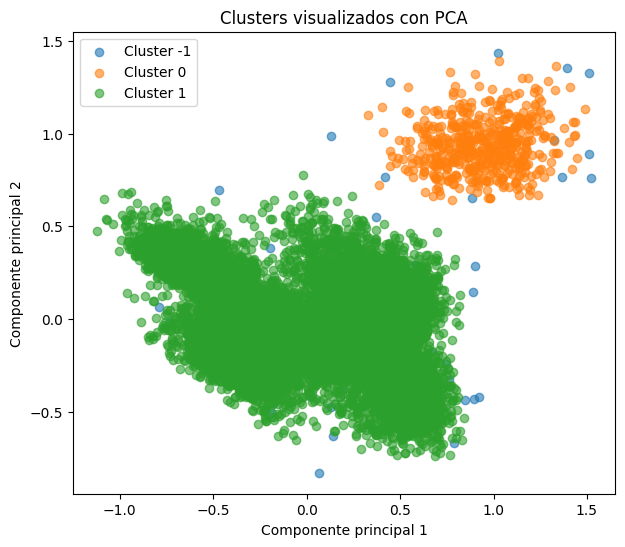

In [21]:
best_clusterer = HDBSCAN(min_cluster_size=2, min_samples=2, cluster_selection_epsilon=0.5)
labels = best_clusterer.fit_predict(X)

# Plot
plt.figure(figsize=(7, 6))
unique_labels = np.unique(labels)
for label in unique_labels:
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], label=f'Cluster {label}', alpha=0.6)
plt.legend()
plt.title('Clusters visualizados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

**RESPUESTA:** Para este caso, con HDBSCAN se obtuvieron "3" clusters, al igual que en el caso anterior un -1 el cual no es concretamente un cluster sino ruido. 

¿Que representa cada cluster?

**RESPUESTA:** Se puede ver claramente que tenemos el ruido (-1), un cluster que esta completamente separado del otro y es más pequeño, entonces por la cantidad de datos segun las clases y lo que se puede ver en los graficos, el cluster 0 es probable que sea el frijol BOMBAY y el otro sea la combinacion de todos los demás. Los puntos de ruido que estan cercanos al 0 pueden significar datos de otros frijoles que estan cerca de BOMBAY y son datos que se salen de lo normal.   

### 3.4 Preguntas teoricas sobre HAC, DBSCAN y HDBSCAN (5 puntos)

#### 3.4.1 En tus palabras, ¿Como funciona el Agglomerative Clustering?

**RESPUESTA:** Por lo que entiendo HAC funciona considerando cada objeto como un cluster diferente y despues los va uniendo de acuerdo a la conectividad que tienen estos, según el metodo para vecinos cercanos elegido y así se genera la jerarquía que se aprecia en un dendograma.

#### 3.4.2 Explique que representa un dendograma, mencionando como las ramas principales podrían significar las clases del datset.

**RESPUESTA:** Representa los clusters que se han unido según la conectividad que tienen los datos. En general las ramas, por lo que logro entender, son las uniones entre cada cluster y según el nivel la cercania que estos datos tienen, las ramas principales deberían relacionarse con las clases que se tienen de los datos, lo cual no se vió en esta tarea.

#### 3.4.3 En el contexto del modelo DBSCAN, ¿Que es un core sample? ¿Que podria representar un core sample en terminos de un dato en el dataset? Apoyese en la clases y sus caracteristicas.

**RESPUESTA:** Un core point o core sample es un punto en el que se cumple que min_samples <= eps, esto significa que tiene una cantidad suficiente de puntos para que se haga un cluster. En consideración a un dato del dataset, esto podría significar un punto que es tipico o que esta entre los datos tipicos de alguna clase. 

#### 3.4.4 En el modelo de DBSCAN se iteran sobre distintos parametros; eps y min_samples. ¿Que representan estos parametros?

**RESPUESTA:** Los parametros significan lo siguiente, para el caso de eps es la distancia maxima para qeu 2 puntos se consideren vecidad y min_samples es el número mínimo de puntos cercanos, para que se haga un cluster. 

#### 3.4.5 ¿Cual es la diferencia entre DBSCAN y HDBSCAN? ¿Que beneficios existen de usar un modelo sobre el otro?

**RESPUESTA:** Se pueden ver diferencias en la selección de parametros pero tambien en su funcionamiento, ya que el primero es un poco máss restrictivo y genera clusters en un unico nivel, en cambio el segundo puede ser un poco más flexible ya que determina el eps optimo automaticamente y genera los clusters tambien enfocado en la jerarquía de los datos. Puede ser beneficioso usar DBSCAN en casos en que los datos esten bien separados, ya que se podrán generar los clusters de buena manera, en cambio HDBSCAN puede ser beneficioso en casos en que los datos no esten tan bien separados y puede manejar m,ejor una mayor densidad de datos en una zona a la hora de generar los clusters. 

# Parte 4: GMM (28 puntos)

### 4.1 Uso de PCA y visualización general (5 puntos)

#### Utilizando PCA de dos dimensiones, colorea y visualiza los distintos tipos de frijoles (Class) presentes en el dataset. ¿Se observan claramente los datos agrupados por clase?

C:\Users\franc\AppData\Local\Temp\ipykernel_2948\406340809.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


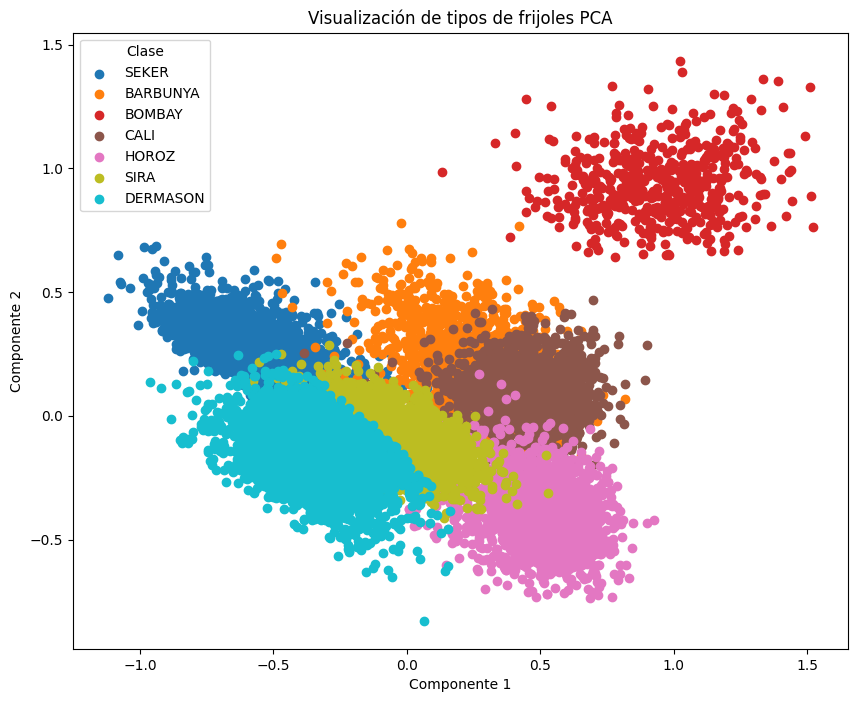

In [22]:
plt.figure(figsize=(10, 8))
classes = y.unique()
colors = plt.cm.get_cmap('tab10', len(classes))

for i, class_name in enumerate(classes):
    plt.scatter(X_pca[y == class_name, 0], X_pca[y == class_name, 1], label=class_name, color=colors(i))

plt.title('Visualización de tipos de frijoles PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase')
plt.show()

**RESPUESTA:** Se observan muy claramente los datos separados por clase, y en el análisis anterior se acertó de manera correcta, que ese cluster era bombay, y que el resto era todo el resto, se puede ver que los datos estan montados y que en el análisis de HDBSCAN el ruido no tiene equivalencia con lo que se puede ver aquí, solo con el hecho de que son datos un poco más alejados a lo normal.

### 4.2 Retención de varianza (3 puntos)

#### Encuentre el numero mínimo de componentes para usar en PCA de tal manera que se mantenga un 95% de varianza. (4 puntos)

In [23]:
pca = PCA()
pca.fit(X)
#de clases
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(0.95, pca.explained_variance_ratio_)

4

In [24]:
pca = PCA(n_components=4)
X_pca95 = pca.fit_transform(X)

### 4.3 Encontrar el número de componentes ideal (4 puntos)

#### Determina cuantas componentes se necesitan de forma ideal para la mezcla de gaussianas usando el criterio de información de Akaike (AIC).

Text(0, 0.5, 'AIC')

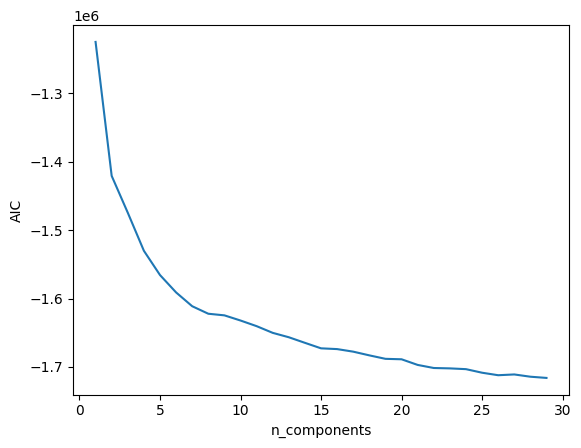

In [25]:
n_components = np.arange(1, 30)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.xlabel('n_components')
plt.ylabel('AIC')

In [26]:
aics = np.asarray([m.aic(X) for m in models])
optimal_n = np.where(aics == np.amin(aics))[0][0]
optimal_n

28

**RESPUESTA:** Análizando la información con aics se obtuvo que los componentes necesarios son 28, aumentando el tamaño se ve que realmente para numeros más grandes no aumenta nuevamente, por lo que no se logra obtener un número de componentes concreto, pero para este caso y por tiempo de ejecución se decidío hasta el 30 y este es 28   

### 4.4 Uso de función clusterize (6 puntos)

#### Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar las clases en `n` grupos. Debes retornar un dataframe que contenga la clasificación. Corre el método con el valor de componentes encontrado en la sección anterior y con el valor de componentes `n_components=7` y retorna el silhouette score resultante para cada clase de cada modelo distinto. 

#### Probablemente, un modelo presentará un mejor score por sobre el otro, explica el por qué sucede aquello. 

In [27]:
def clusterize(X, n_components):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X)
    
    labels = gmm.predict(X)
    cluster_labels = pd.DataFrame(data={'Cluster': labels})
    silhouette = silhouette_score(X, labels)
    
    return cluster_labels, silhouette

cluster_labels_optimal, silhouette_optimal = clusterize(X, optimal_n)

cluster_labels_7, silhouette_7 = clusterize(X, 7)

print(f"Silhouette Score con {optimal_n} componentes: {silhouette_optimal}")
print(f"Silhouette Score con 7 componentes: {silhouette_7}")

Silhouette Score con 28 componentes: 0.13720702410048927
Silhouette Score con 7 componentes: 0.3181173202131012


**Respuesta:** Se obtuvo un mejor resultado con 7 componentes, esto puede deberse a que es exactamente el numero de clases que hay, por lo que ese numero de componentes se asocia de mejor manera con la estructura de los datos. Además, puede ser que tener 7 componentes haga que el modelo no sesobre adapte a los datos, dejando muchos clusters pequeños. 

### 4.5 Evaluación del modelo GMM (6 puntos)

**Para esta sección, utilize el modelo con mejor silhouette score obtenido.** 

In [28]:
gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

df['Cluster'] = labels

#### 4.5.1 Con respecto a los clusters formados por el modelo ¿Existe alguna especie repartida en más de dos clusters? (2 puntos)

In [29]:
new_df = df[['Class', 'Cluster']]
species = new_df['Class'].unique()

for s in species:
    print(f"Clase: {s}")
    print(new_df[new_df['Class'] == s]['Cluster'].value_counts())
    print("")


Clase: SEKER
Cluster
5    1870
0     101
4      42
3      13
1       1
Name: count, dtype: int64

Clase: BARBUNYA
Cluster
1    978
4    305
0     26
5      6
6      6
2      1
Name: count, dtype: int64

Clase: BOMBAY
Cluster
2    522
Name: count, dtype: int64

Clase: CALI
Cluster
1    1571
6      42
0      10
4       6
5       1
Name: count, dtype: int64

Clase: HOROZ
Cluster
6    1798
4      70
0      27
1      27
3       6
Name: count, dtype: int64

Clase: SIRA
Cluster
0    2391
3      84
6      70
4      60
5      24
1       7
Name: count, dtype: int64

Clase: DERMASON
Cluster
3    2738
0     604
4     109
5      95
Name: count, dtype: int64



In [30]:
new_df = df[['Class', 'Cluster']]
species = new_df['Class'].unique()

for s in species:
    clusters = new_df[new_df['Class'] == s]['Cluster'].value_counts()
    print(f"Clase: {s} está en {len(clusters)} clusters")

Clase: SEKER está en 5 clusters
Clase: BARBUNYA está en 6 clusters
Clase: BOMBAY está en 1 clusters
Clase: CALI está en 5 clusters
Clase: HOROZ está en 5 clusters
Clase: SIRA está en 6 clusters
Clase: DERMASON está en 4 clusters


**Respuesta:** Se puede ver que en general, la mayoría esta esparcido en más de 2 clusters menos BOMBAY  

#### 4.5.2 Determine la especie predominante en cada cluster según el valor más repetido por grupo. Con esto, calcule la precisión de cada especie al ser clasificada. ¿El modelo GMM tuvo buenos resultados? (4 puntos)

(Recuerde que para calcular la precisión, se puede usar la cantidad de especies encontradas en el cluster dividido en la cantidad total u optima de especies a encontrar en el cluster)

In [31]:
predominant_species = new_df.groupby('Cluster')['Class'].agg(lambda x: x.value_counts().idxmax())
print(predominant_species)

Cluster
0        SIRA
1        CALI
2      BOMBAY
3    DERMASON
4    BARBUNYA
5       SEKER
6       HOROZ
Name: Class, dtype: object


In [32]:
cluster_counts = new_df.groupby('Cluster')['Class'].value_counts().unstack(fill_value=0)
total_per_cluster = new_df['Cluster'].value_counts()
precision_per_cluster = cluster_counts.div(total_per_cluster, axis=0)
print(precision_per_cluster)

Class    BARBUNYA    BOMBAY      CALI  DERMASON     HOROZ     SEKER      SIRA
Cluster                                                                      
0        0.008230  0.000000  0.003166  0.191200  0.008547  0.031972  0.756885
1        0.378483  0.000000  0.607972  0.000000  0.010449  0.000387  0.002709
2        0.001912  0.998088  0.000000  0.000000  0.000000  0.000000  0.000000
3        0.000000  0.000000  0.000000  0.963745  0.002112  0.004576  0.029567
4        0.515203  0.000000  0.010135  0.184122  0.118243  0.070946  0.101351
5        0.003006  0.000000  0.000501  0.047595  0.000000  0.936874  0.012024
6        0.003132  0.000000  0.021921  0.000000  0.938413  0.000000  0.036534


In [33]:
for cluster, species in predominant_species.items():
    print(f"Cluster {cluster}: Especie predominante = {species}, Precisión = {precision_per_cluster.loc[cluster, species]:.3f}")


Cluster 0: Especie predominante = SIRA, Precisión = 0.757
Cluster 1: Especie predominante = CALI, Precisión = 0.608
Cluster 2: Especie predominante = BOMBAY, Precisión = 0.998
Cluster 3: Especie predominante = DERMASON, Precisión = 0.964
Cluster 4: Especie predominante = BARBUNYA, Precisión = 0.515
Cluster 5: Especie predominante = SEKER, Precisión = 0.937
Cluster 6: Especie predominante = HOROZ, Precisión = 0.938


**RESPUESTA:** Se peude ver que en general GMM tuvo un buen rendimiento comparando con el pca que se graficó anteriormente y se puede ver por los puntos de precision.

### 4.6 Preguntas teoricas sobre GMM (4 puntos)

Responde brevemente a las siguientes preguntas relacionadas con GMM.

#### 4.6.1 ¿Por qué un desbalance de clases puede ser perjudicial al momento de identificar clusters? Relacione esto con el uso de GMM para clasificar. 

**Respuesta:** Un desbalance en los datos, como GMM se basa mucho enla estructura de los datos, puede ser perjudicial ya que puede realizar una generacion de cluster de manera sesgada según si una clase es más dominante. Esto se aprecia de una manera reducida en este ejercicio, BOMBAY que es la que menos tiene, logra una buena precisión pero porque esta más alejada del resto de los datos, despues para las otras clases con menos datos se ve que tuvo una menor precisión y en este caso los datos si estaban más cerca que el resto.

#### 4.6.2 Explica qué es Akaike Information Criterion (AIC) ¿Existe alguno que se ajuste mejor a este dataset y al uso de GMM? Justifique su respuesta.

**Respuesta** AIC es una medida que permite comparar modelos y seleccionar el más adecuado para la estructura de los datos. Para el caso de GMM, como este se basa en la estrutura de los datos es muy útil porque permite saber el número óptimo de componentes para el modelo. En esta tarea se pudo ver como AIC no fue muy eficiente para la elección probablemente por la superposición de los datos. Además se pudo ver que para este dataset y con GMM, el número de componentes 7 fue más eficiente y probablemente componetnes bajas como 4 o 5 también lo hubiesen sido por lo mencionado anteriormente.

#### 4.6.3 ¿Qué es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal? Refierete a esto según el dataset.

In [ ]:
# https://cienciadedatos.net/documentos/py23-deteccion-anomalias-gmm-python#:~:text=Introducci%C3%B3n,m%C3%BAltiples%20distribuciones%20normales%20(componentes).

**Respuesta** Es un modelo probabilistico que considera que los puntos son generados por una distribucion normal. En general, suelen funcionar bien apra casos de la generación de clusters en subpoblaciones y por lo anterior también para casos en los que realmente los datos distribuyan normal. Para el caso de este dataset, se ve que funcionó muy bien por lo mismo, ya que logro captar las "subpoblaciones" de los frijoles que estaban sobrepuestos.      

#### 4.6.4 ¿Qué es el Silhouette Score? ¿Cual es la importancia de este al momento de interpretar el funcionamiento de un modelo?

**Respuesta** Por lo que logré entender de las clases es una medida, que permite ver la calidad de los clusters, ya que se basa en la distancia entre los puntos y los clusters, por lo que si es cercano a 1, significa que los clusters están bien separados. Es de gran importancia porque permite analizar si los clusters se hicieron de buena manera, si es necesario cambiar algún parametro o si es mejor probar con otro modelo, para obtener mejores resultados.

# Parte 5: Comparación y eficiencia (3 puntos)

#### 5.1 ¿Cuál de los métodos de clustering resultó ser el más eficiente entre HAC, DBSCAN, HDBSCAN y GMM? Da una explicación de por qué se puede deber el resultado.

**Respuesta:** En general considero que GMM fue el más eficiente en comparacio con el resto y esto, puede deberse a que GMM es el unico que puede manejar de buena manera superposición de datos, HAC lo hace por la conectividad entre estos y los SCAN por densidad, entonces al graficar con PCA cada cluster de manera independiente, pudimos ver que los datos estaban superpuestos y mezclados, y esta puede ser una buena razón de porque GMM fue superior.   